In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Japan'
raceDate = '16-19/11/2023'
surface = 'Tarmac'
competition = 'Wrc'

link = 'https://www.ewrc-results.com/results/80245-forum8-rally-japan-2023/?s='
startat, no_ss=437143, int(22)

canceled = [4]


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#11,Neuville Thier,RC1,1:47.6,-,70.3,1,Japan,16-19/11/2023,Tarmac,Wrc,1
1,2,#4,Lappi Esapekka,RC1,1:48.3,+0.7 + 0.7,69.8 0.33,1,Japan,16-19/11/2023,Tarmac,Wrc,2
2,3,#8,Tänak Ott - J,RC1,1:49.0,+1.4 + 0.7,69.4 0.67,1,Japan,16-19/11/2023,Tarmac,Wrc,3
3,4,#6,Sordo Dani -,RC1,1:49.4,+1.8 + 0.4,69.1 0.86,1,Japan,16-19/11/2023,Tarmac,Wrc,4
4,5,#18,Katsuta Takamo,RC1,1:50.7,+3.1 + 1.3,68.3 1.48,1,Japan,16-19/11/2023,Tarmac,Wrc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,#23,Kovalainen Hei,RC2,11:52.1 [N],+10:05.1 + 9:21.9,10.6 288.1,16,Japan,16-19/11/2023,Tarmac,Wrc,28
28,28,#30,Imai Satoshi,RC2,11:52.1 [N],+10:05.1 + 0.0,10.6 288.1,16,Japan,16-19/11/2023,Tarmac,Wrc,29
29,30,#34,Arai Toshi -,NAT,12:03.2,+10:16.2 + 11.1,10.5 293.4,16,Japan,16-19/11/2023,Tarmac,Wrc,30
30,30,#38,Hotta Makoto,NAT,12:03.2,+10:16.2 + 0.0,10.5 293.4,16,Japan,16-19/11/2023,Tarmac,Wrc,31


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Neuville Thier,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,1,107.6
1,Lappi Esapekka,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,2,108.3
2,Tänak Ott - J,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,3,109.0
3,Sordo Dani -,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,4,109.4
4,Katsuta Takamo,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,5,110.7
...,...,...,...,...,...,...,...,...,...
27,Kovalainen Hei,RC2,16,Japan,16-19/11/2023,Tarmac,Wrc,28,NaN
28,Imai Satoshi,RC2,16,Japan,16-19/11/2023,Tarmac,Wrc,29,NaN
29,Arai Toshi -,NAT,16,Japan,16-19/11/2023,Tarmac,Wrc,30,723.2
30,Hotta Makoto,NAT,16,Japan,16-19/11/2023,Tarmac,Wrc,31,723.2


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race  ss Gr/Cl             
Japan 1  NAT          122.3
         RC1          107.6
         RC2          112.9
         RC3          141.0
         RC4          124.6
...                     ...
      16 RC1          107.0
         RC2          112.1
         RC3          128.5
         RC4          122.3
         RC5          133.0

[90 rows x 1 columns]

In [11]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Neuville Thier,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,1,107.6,107.6,107.6,0.0,0.0,0.000000,01
1,Lappi Esapekka,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,2,108.3,107.6,107.6,0.7,0.7,0.650558,01
2,Tänak Ott - J,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,3,109.0,107.6,107.6,1.4,1.4,1.301115,01
3,Sordo Dani -,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,4,109.4,107.6,107.6,1.8,1.8,1.672862,01
4,Katsuta Takamo,RC1,1,Japan,16-19/11/2023,Tarmac,Wrc,5,110.7,107.6,107.6,3.1,3.1,2.881041,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Arai Toshi -,NAT,16,Japan,16-19/11/2023,Tarmac,Wrc,30,723.2,123.2,107.0,616.2,600.0,487.012987,16
484,Hotta Makoto,NAT,16,Japan,16-19/11/2023,Tarmac,Wrc,31,723.2,123.2,107.0,616.2,600.0,487.012987,16
485,Takata Koji -,NAT,16,Japan,16-19/11/2023,Tarmac,Wrc,32,723.2,123.2,107.0,616.2,600.0,487.012987,16
486,Bailey Jason,RC3,16,Japan,16-19/11/2023,Tarmac,Wrc,18,128.5,128.5,107.0,21.5,0.0,0.000000,16


In [13]:
Group = 'RC1'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['RC1', 'RC2']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2.csv')

In [14]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,05,06,07,08,09,10,11,12,13,14,15,16
Crew,,,,,,,,,,,,,,,
Boland Eamonn,12.5,NaN,69.0,151.2,82.3,120.3,NaN,110.2,64.8,22.1,21.0,95.0,64.2,21.5,14.2
Chwist Daniel,8.0,NaN,93.6,164.0,85.2,92.6,20.4,86.1,57.2,14.1,15.0,88.2,65.7,26.9,8.3
Díaz-Aboitiz M,11.3,NaN,179.9,284.1,165.2,184.2,NaN,186.8,128.1,30.7,22.0,191.7,144.7,39.0,24.3
Evans Elfyn -,4.9,0.0,0.0,18.8,0.3,1.1,2.0,3.1,23.0,0.0,0.0,13.5,41.3,1.4,2.9
Fourmaux Adrie,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fukunaga Osamu,10.2,NaN,47.9,113.6,78.3,87.3,9.3,87.7,49.6,14.2,15.0,66.2,63.2,17.1,13.1
Gryazin Nikola,0.0,NaN,30.9,0.0,9.4,8.9,0.1,4.3,7.5,0.0,0.0,0.0,15.5,3.7,0.4
Imai Satoshi,11.8,NaN,99.7,206.3,126.4,156.6,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kajetanowicz K,2.2,NaN,85.2,73.5,40.1,59.0,1.4,62.9,36.4,1.7,0.7,40.3,40.3,4.9,1.7


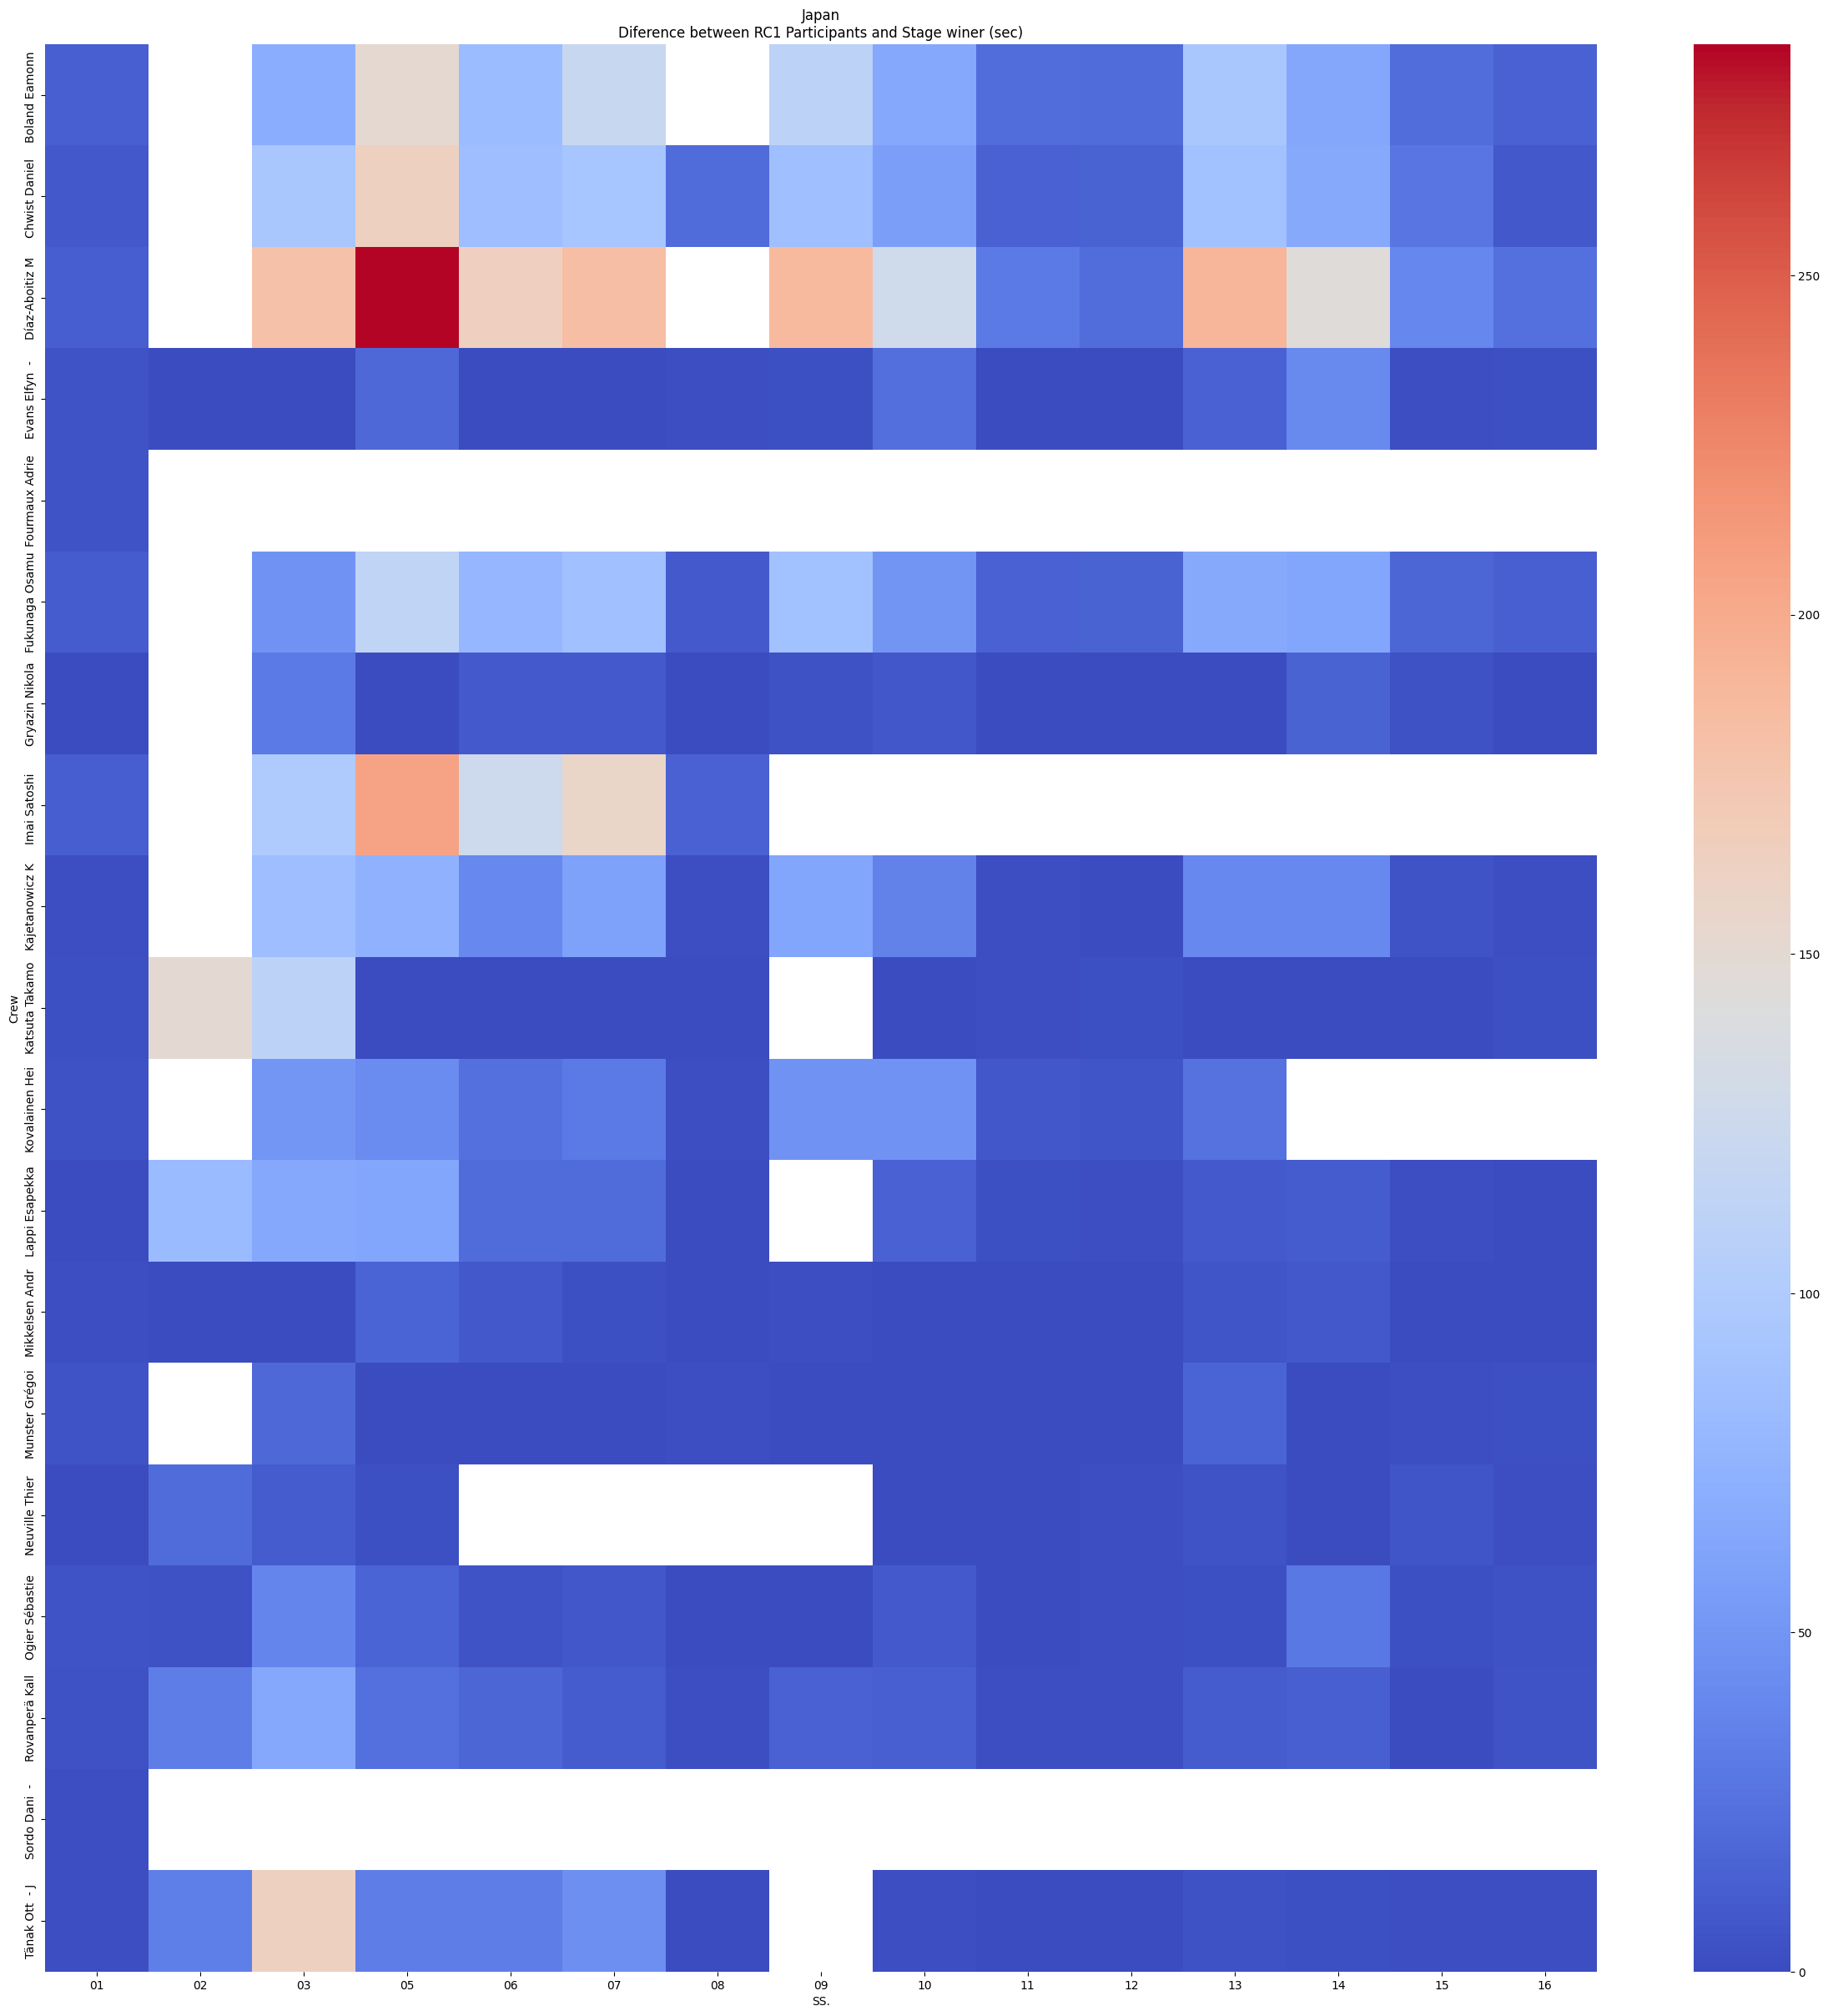

In [15]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + ".png")
plt.show()

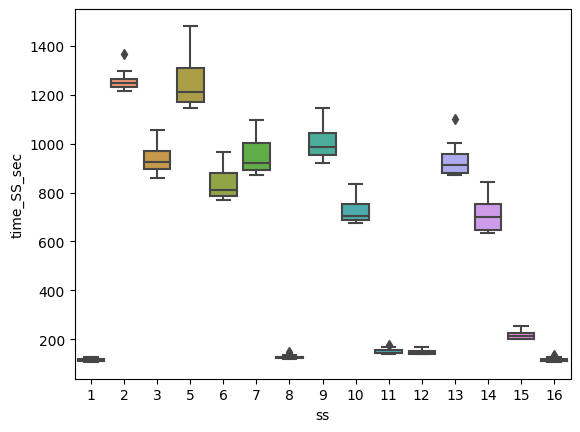

In [16]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot_" + Group + ".png")

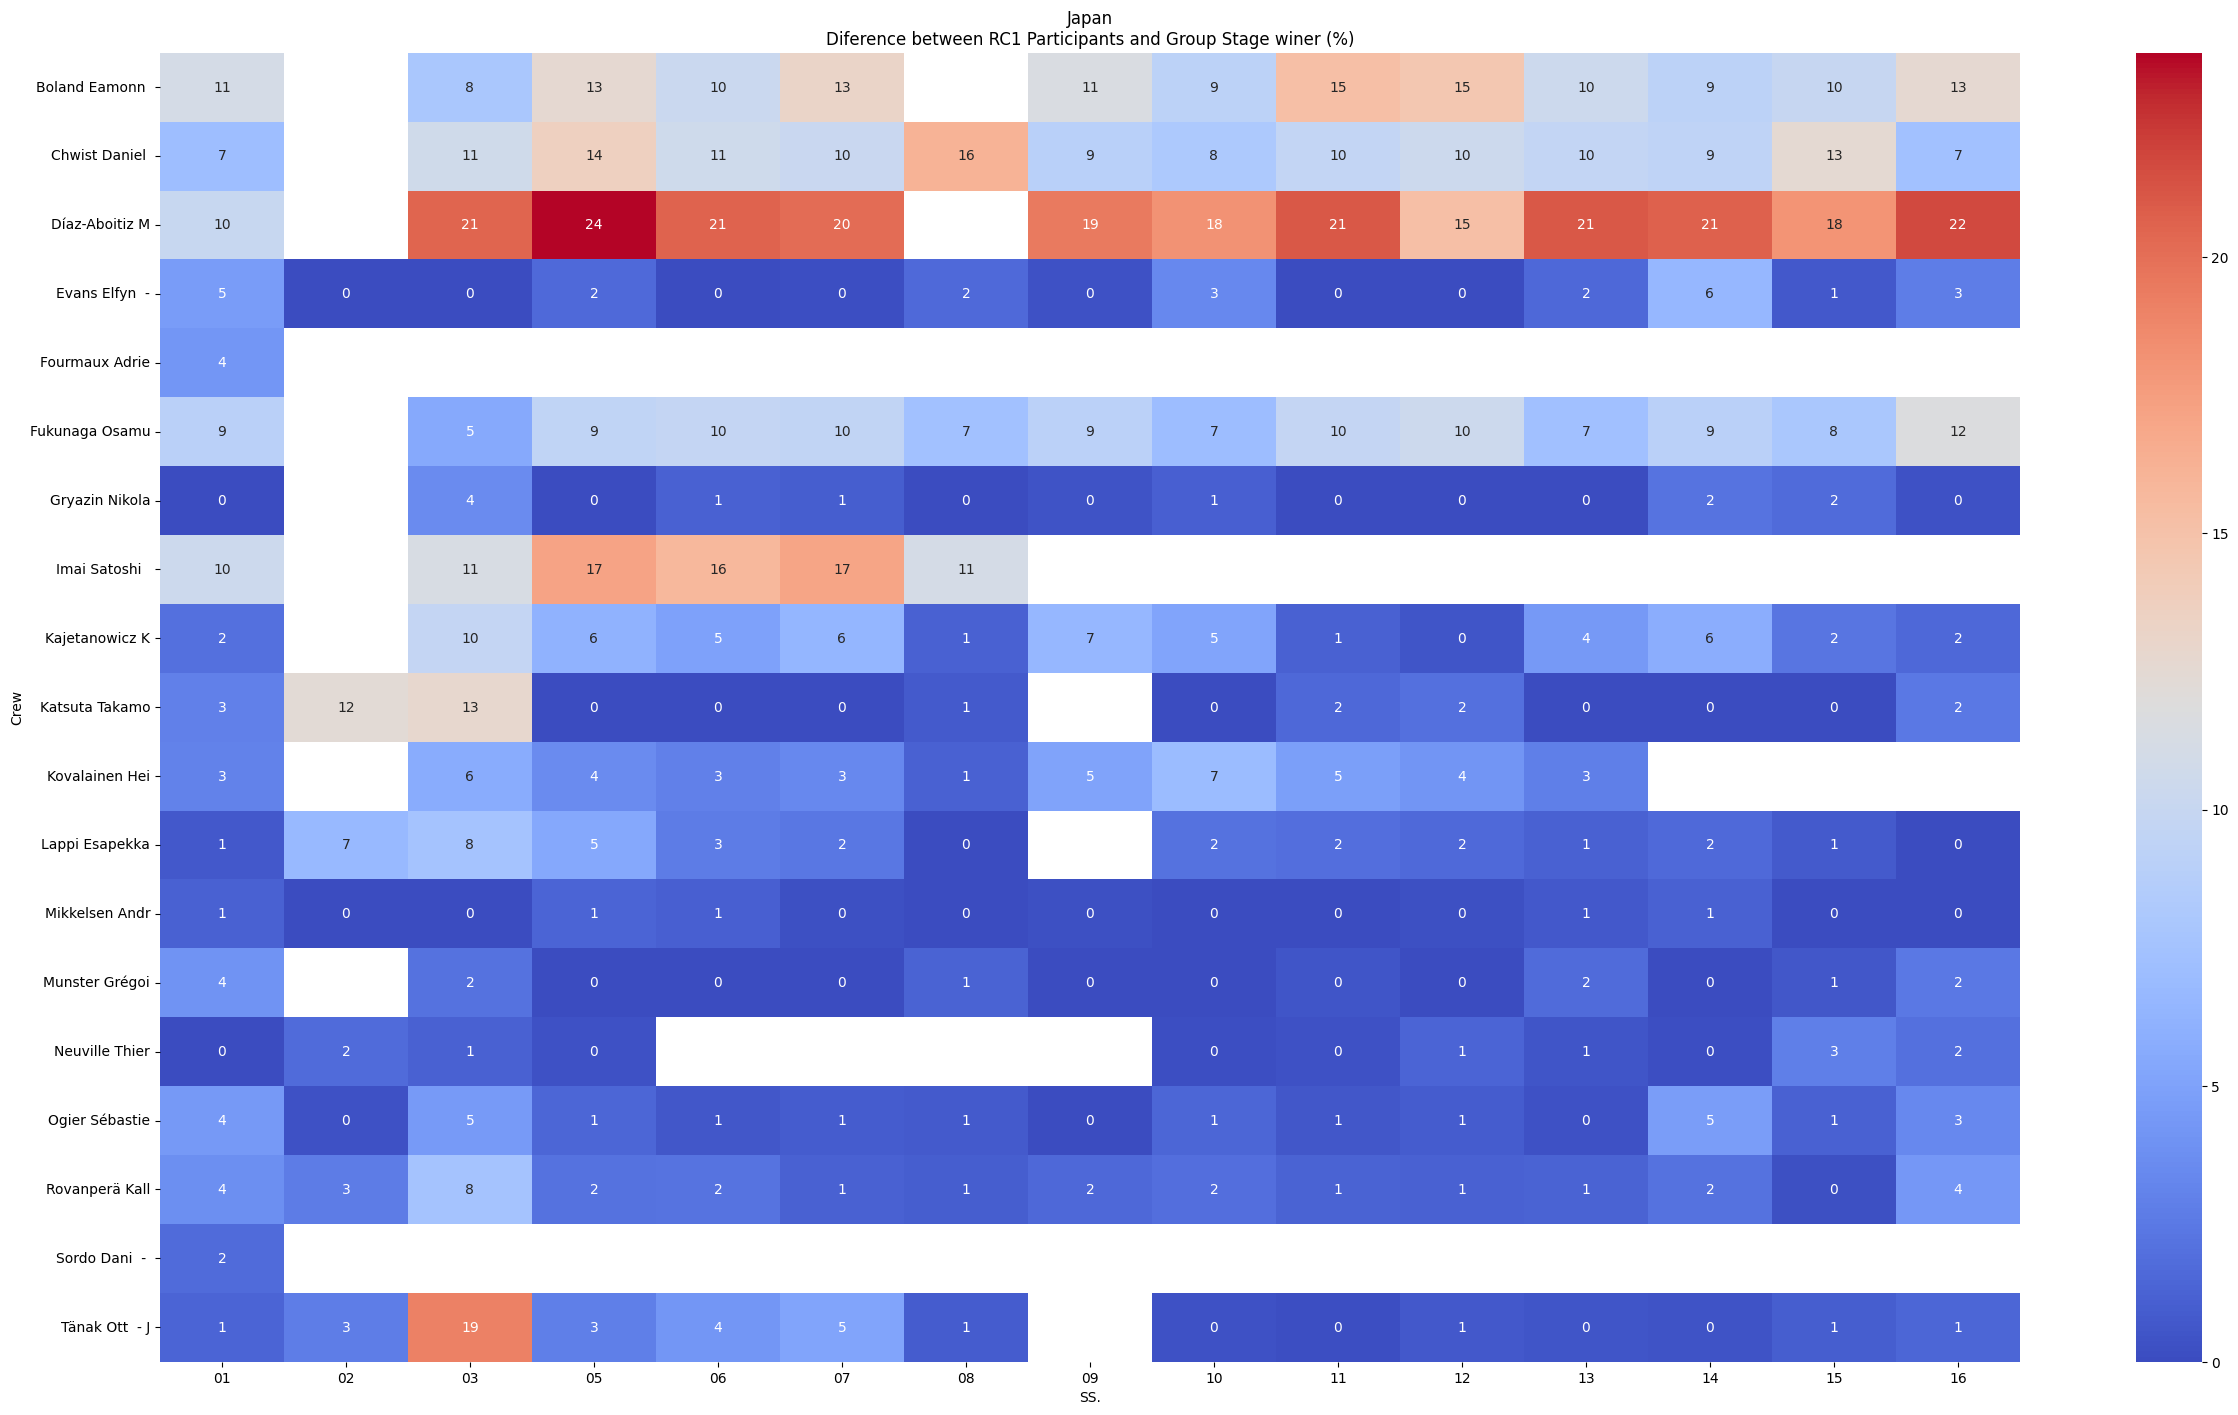

In [17]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
#plt.savefig(rallyname + Group + ".jpg")
plt.show()